## Imports

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.io
from scipy.interpolate import interp1d
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

## Functions

In [2]:
def get_xy(index):
    '''Gets the time and values of a given index 
    and stores them in an array of appropriate size.
    The time is the first column and the data are the
    subsequent columns'''
    
    t = dh[index].x[0]
    y = np.transpose(dh[index].y[0])
    if len(np.shape(y)) == 1:
        data = np.zeros((np.shape(t)[0],2))
        data[:,1] = y
    else:
        data = np.zeros((np.shape(t)[0],np.shape(y)[1]+1))
        data[:,1:np.shape(y)[1]+1] = y
    data[:,0] = t
    return data

In [3]:
def get_index(string_handle):
	for i in range(len(dq)):
		string = dq[i][0].decode()
		if string[4:] == string_handle:
			index = i
	return index

In [4]:
def remove_nans(data):
    '''For a data set arranged with different dimensions
    or parameters in each column (such as a time series with
    each row representing a timestep), this function removes
    all rows which contain at least one NaN. In this way, it is 
    simple to plot all timesteps where all dimensions or parameters
    are well defined'''
    
    non_nan_indices = np.array([])
    
    for idx in range(np.shape(data)[0]): #Iterate through timesteps
        if ~np.isnan(data[idx,:]).any():
            non_nan_indices = np.append(non_nan_indices, idx)
    non_nan_indices = [int(x) for x in non_nan_indices]
    
    return data[non_nan_indices, :]
    
    

In [46]:
def remove_zeros(data):
    '''For a data set arranged with different dimensions
    or parameters in each column (such as a time series with
    each row representing a timestep), this function removes 
    all rows which contain at least one 0'''
    
    non_zero_indices = np.array([])
    
    for idx in range(np.shape(data)[0]): #Iterate through timesteps
        if 0 not in data[idx,:]:
            non_zero_indices = np.append(non_zero_indices, idx)
    non_zero_indices = [int(x) for x in non_zero_indices]
    
    return data[non_zero_indices, :]

In [138]:
def norm_to_med(data):
    '''This function normalizes each dimension of a data set
    to the median of that dimension'''
    
    data_norm = np.copy(data);
    
    for idx in range(np.shape(data)[1]): #iterate through dimensions
        data_norm[:,idx] = data[:,idx] / np.median(data[:,idx])
    return data_norm
        

In [5]:
def unix_to_utc(unix_time_array):
    '''Takes array of tick labels in unix time
    and converts them into readable utc'''
    result = [None]*(len(unix_time_array))
    for i in range(len(unix_time_array)):
        result[i] = datetime.datetime.utcfromtimestamp(unix_time_array[i]
        ).strftime('%H:%M:%S')
    print("result type:",type(result))
    return result

In [6]:
def set_time():
    '''get the current x-limits and use these to set the time
    to a correct and readable UTC format'''
    ax = plt.gca()
    ax.set_xticklabels(unix_to_utc(ax.get_xticks()))
    return
    
    
    

## Code

In [7]:
#July 14, 2008 file
file = 'TPLOT_save_file_THC_FGM_2008-07-14.tplot'
f = scipy.io.readsav(file,python_dict=True)

dq = f['dq']
dh = dq['dh']

In [8]:
#To find names and indicies
#Remember that it's offset 1 from IDL !!

for i in range(len(dq)):
    print(i, dq[i][0])

0 b'thc_state_pos'
1 b'thc_state_vel'
2 b'thc_state_man'
3 b'thc_state_roi'
4 b'thc_state_spinras'
5 b'thc_state_spindec'
6 b'thc_state_spinalpha'
7 b'thc_state_spinbeta'
8 b'thc_state_spinper'
9 b'thc_state_spinphase'
10 b'thc_state_spinras_correction'
11 b'thc_state_spindec_correction'
12 b'thc_state_pos_gse'
13 b'thc_state_pos_gsm'
14 b'thc_state_vel_gse'
15 b'thc_state_vel_gsm'
16 b'thc_state_pos_sel'
17 b'thc_state_pos_sse'
18 b'thc_state_vel_sel'
19 b'thc_state_vel_sse'
20 b'thc_state_spinras_corrected'
21 b'thc_state_spindec_corrected'
22 b'thc_fgs_gse'
23 b'thc_fgs_gsm'
24 b'thc_fgs_dsl'
25 b'thc_fgl_gse'
26 b'thc_fgl_gsm'
27 b'thc_fgl_dsl'
28 b'thc_fgl_ssl'
29 b'thc_fgh_gse'
30 b'thc_fgh_gsm'
31 b'thc_fgh_dsl'
32 b'thc_fgh_ssl'
33 b'thc_fge_gse'
34 b'thc_fge_gsm'
35 b'thc_fge_dsl'
36 b'thc_fge_ssl'
37 b'thc_fgs_mag'
38 b'thc_fgs_fci_flh_fce'
39 b'thc_fgl_mag'
40 b'thc_fgl_fci_flh_fce'
41 b'thc_fgh_mag'
42 b'thc_fgh_fci_flh_fce'
43 b'thc_state_pos__sm'
44 b'thc__Rad'
45 b'thc__

## V cross B

In [9]:
#Get vars
vel_str = 'peeb_velocity_gse'
vel_idx = get_index(vel_str)
vel = get_xy(vel_idx)

mag_str = 'fgs_gse'
mag_idx = get_index(mag_str)
mag = get_xy(mag_idx)

interp_time = vel[:,0]
time = interp_time
B_x = np.interp(interp_time, mag[:,0], mag[:,1])
B_y = np.interp(interp_time, mag[:,0], mag[:,2])
B_z = np.interp(interp_time, mag[:,0], mag[:,3])

B = np.transpose(np.vstack((B_x, B_y, B_z)))

v_cross_B = np.cross(vel[:,1:], B)


B_magnitude_string = 'fgs_mag'
B_magnitude_idx = get_index(B_magnitude_string)
B_magnitude = get_xy(B_magnitude_idx)
B_magnitude = np.interp(interp_time, B_magnitude[:,0], B_magnitude[:,1])



<IPython.core.display.Javascript object>


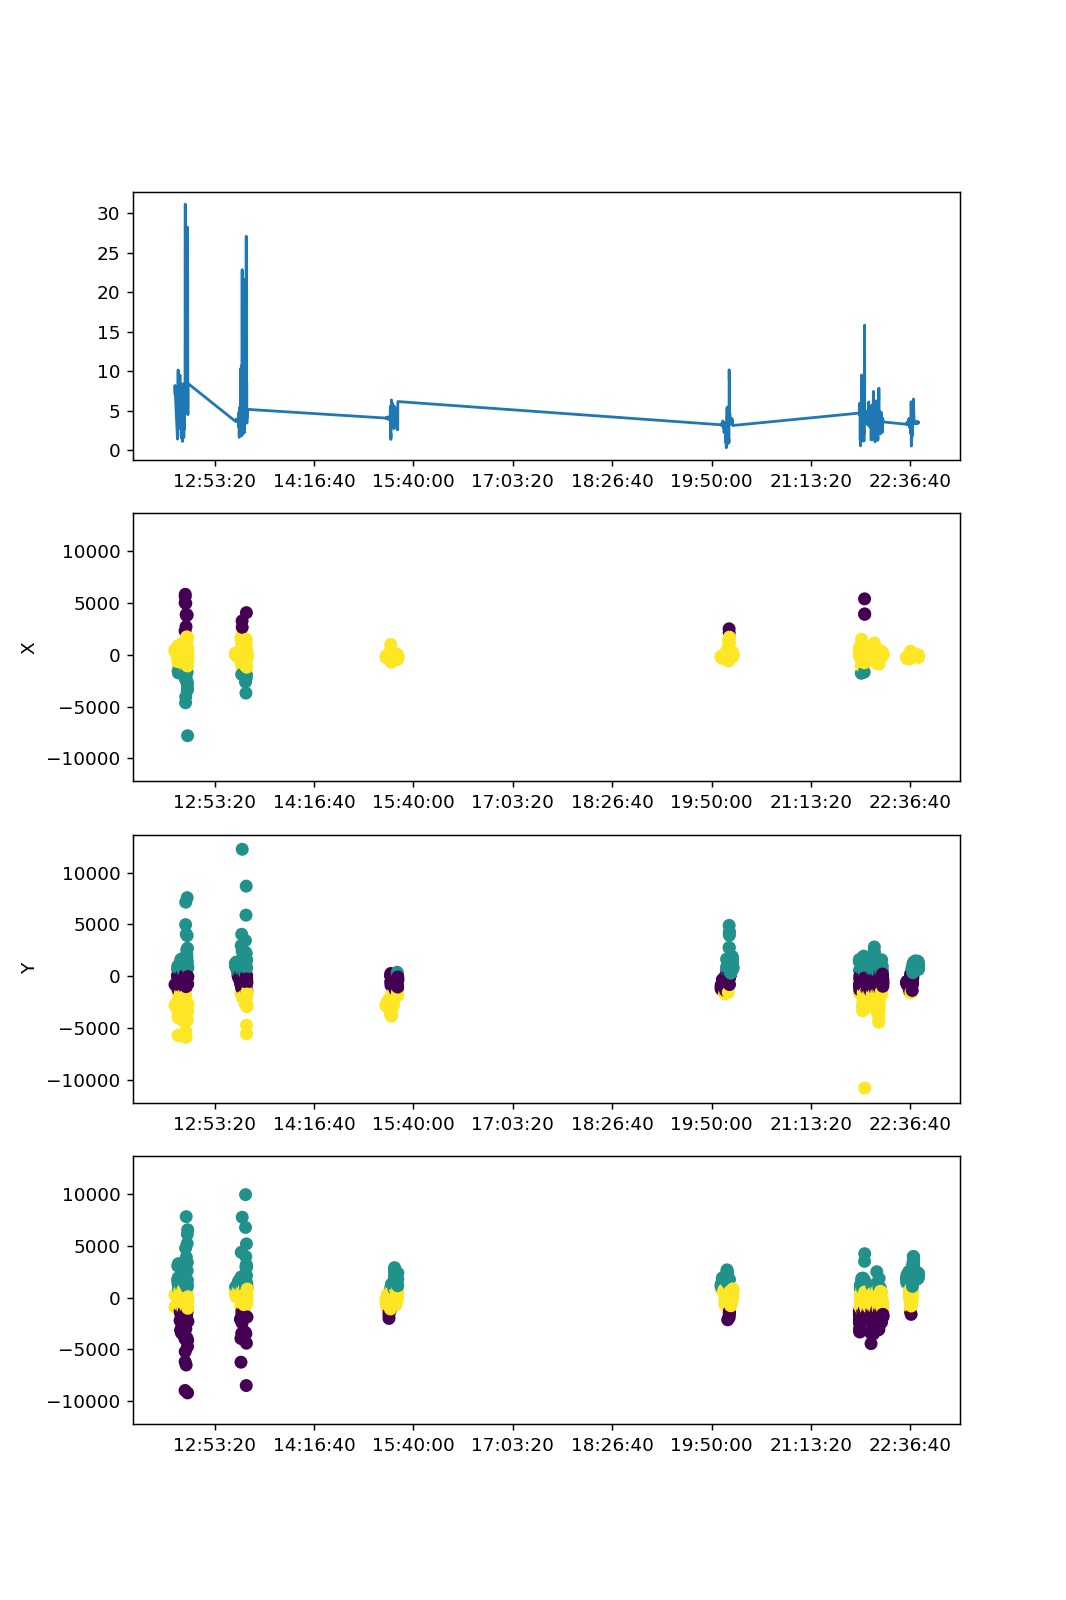

result type: <class 'list'>


In [13]:
#Use components of v_cross_B with B_magnitude for clustering

k = 3

colorstr = 'rgb'

d1 = np.transpose(np.vstack((v_cross_B[:,0], B_magnitude)))
kmeans1 = KMeans(n_clusters=k).fit(d1)
y_kmeans1 = kmeans1.predict(d1)
centers1 = kmeans1.cluster_centers_

fig = plt.figure(figsize=(8,12))

ax0 = fig.add_subplot(4,1,1)
ax0.plot(time,B_magnitude)

ax1 = fig.add_subplot(4,1,2, sharex=ax0)
ax1.scatter(time,d1[:,0], c=y_kmeans1)
ax1.set_ylabel('X')

d2 = np.transpose(np.vstack((v_cross_B[:,1], B_magnitude)))
kmeans2 = KMeans(n_clusters=k).fit(d2)
y_kmeans2 = kmeans2.predict(d2)
centers2 = kmeans2.cluster_centers_

ax2 = fig.add_subplot(4,1,3, sharex=ax0, sharey=ax1)
ax2.scatter(time,d2[:,0], c=y_kmeans2)
ax2.set_ylabel('Y')

d3 = np.transpose(np.vstack((v_cross_B[:,2], B_magnitude)))
kmeans3 = KMeans(n_clusters=k).fit(d3)
y_kmeans3 = kmeans3.predict(d3)
centers3 = kmeans3.cluster_centers_

ax3 = fig.add_subplot(4,1,4, sharex=ax0, sharey=ax1)
ax3.scatter(time,d3[:,0], c=y_kmeans3)

set_time()


# To do 
## Put into polar coordinates

## PLI and Exponential with V_cross_B

## Amplitude (fit A) should depend on number density

# PLI V_cross_B Clustering

In [139]:
#Looking at PLI with V_cross_B

#Power law index
pli_str = 'peeb_powerlaws_good'
pli_idx = get_index(pli_str)
pli = get_xy(pli_idx)

#Electron Velocity Vectors
v_str = 'peeb_velocity_gse'
v_idx = get_index(v_str)
v = get_xy(v_idx)

#Magnetic Field Vectors
mag_str = 'fgs_gse'
mag_idx = get_index(mag_str)
mag = get_xy(mag_idx)

#Magnetic Field Magnitude
B_magnitude_string = 'fgs_mag'
B_magnitude_idx = get_index(B_magnitude_string)
B_magnitude = get_xy(B_magnitude_idx)

#PLI has fewest timesteps. Use this for interpolation time
interp_time = pli[:,0]
time = interp_time

B_magnitude = np.interp(interp_time, B_magnitude[:,0], B_magnitude[:,1])
B_x = np.interp(interp_time, mag[:,0], mag[:,1])
B_y = np.interp(interp_time, mag[:,0], mag[:,2])
B_z = np.interp(interp_time, mag[:,0], mag[:,3])
v_x = np.interp(interp_time, v[:,0], v[:,1])
v_y = np.interp(interp_time, v[:,0], v[:,2])
v_z = np.interp(interp_time, v[:,0], v[:,3])
pli = pli[:,1:] #Use time for plotting, keep PLI as components only

B = np.transpose(np.vstack((B_x, B_y, B_z)))
v = np.transpose(np.vstack((v_x, v_y, v_z)))
#Cross Product

#v_cross_B = np.cross(v[:,1:], B)
v_cross_B = np.cross(v, B)

In [147]:
#Use components of v_cross_B with PLI for clustering

k = 3

d1 = np.transpose(np.vstack((time, v_cross_B[:,1], pli[:,0])))
d2 = np.transpose(np.vstack((time, v_cross_B[:,1], pli[:,1])))
d3 = np.transpose(np.vstack((time, v_cross_B[:,1], pli[:,2])))
print('d1 Before', d1.shape)
print('d2 Before', d2.shape)
print('d3 Before', d3.shape)

# d1 = np.transpose(np.vstack((v_cross_B[:,0], pli[:,0])))
d1 = remove_zeros(remove_nans(d1))
d2 = remove_zeros(remove_nans(d2))
d3 = remove_zeros(remove_nans(d3))

print('d1 After', d1.shape)
print('d2 After', d2.shape)
print('d3 After', d3.shape)

#Don't take time into account for kmeans
time1_kmeans = d1[:,0]
time2_kmeans = d2[:,0]
time3_kmeans = d3[:,0]
d1_kmeans = d1[:,1:]
d2_kmeans = d2[:,1:]
d3_kmeans = d3[:,1:]

#Normalize to median
d1_kmeans_norm = norm_to_med(d1_kmeans)
d2_kmeans_norm = norm_to_med(d2_kmeans)
d3_kmeans_norm = norm_to_med(d3_kmeans)

kmeans1 = KMeans(n_clusters=k).fit(d1_kmeans_norm)
y_kmeans1 = kmeans1.predict(d1_kmeans_norm)
centers1 = kmeans1.cluster_centers_

kmeans2 = KMeans(n_clusters=k).fit(d2_kmeans_norm)
y_kmeans2 = kmeans2.predict(d2_kmeans_norm)
centers2 = kmeans2.cluster_centers_

kmeans3 = KMeans(n_clusters=k).fit(d3_kmeans_norm)
y_kmeans3 = kmeans3.predict(d3_kmeans_norm)
centers3 = kmeans3.cluster_centers_

d1 Before (1330, 3)
d2 Before (1330, 3)
d3 Before (1330, 3)
d1 After (866, 3)
d2 After (924, 3)
d3 After (94, 3)


<IPython.core.display.Javascript object>


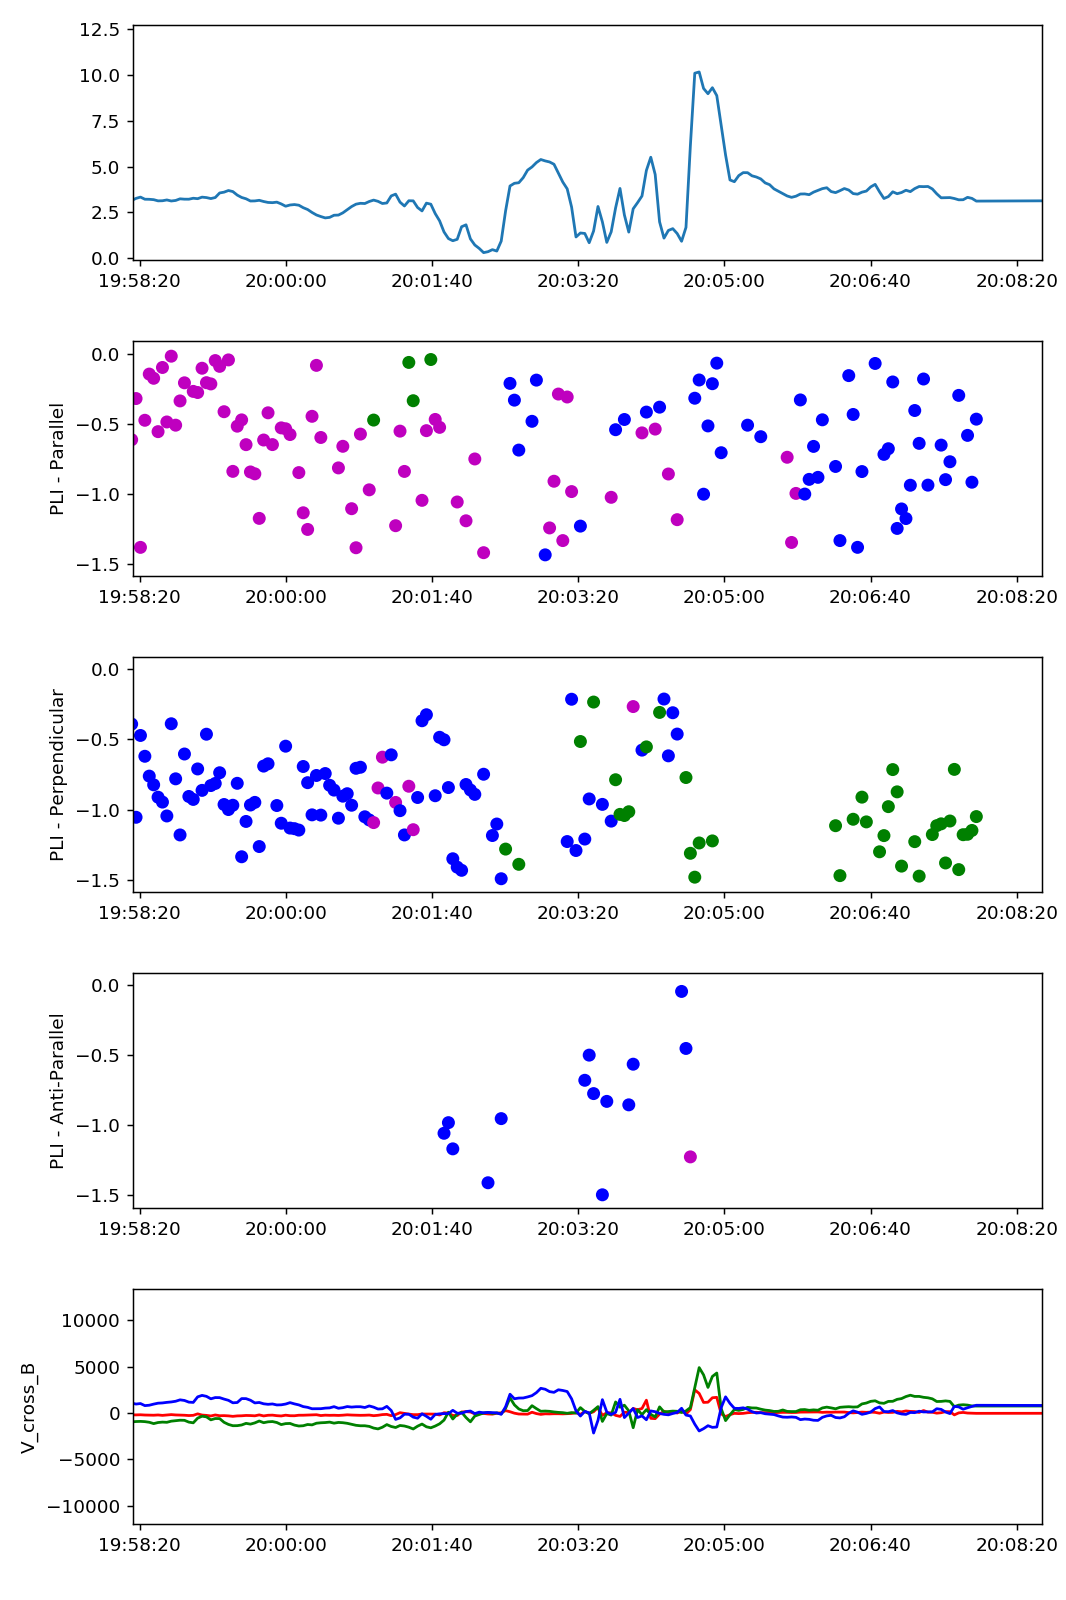

result type: <class 'list'>


In [148]:
#Plot clusters as time series

label_color_map = {0 : 'b', 1 : 'g', 2 : 'm', 3 : 'k', 4 : 'c', 5 : 'r'}
label_color1 = [label_color_map[l] for l in y_kmeans1]
label_color2 = [label_color_map[l] for l in y_kmeans2]
label_color3 = [label_color_map[l] for l in y_kmeans3]

fig = plt.figure(figsize=(8,12))

#ax0 = fig.add_subplot(4,1,1)
#ax0.plot(time,B_magnitude)

ax0 = fig.add_subplot(5,1,1)
ax0.plot(time, B_magnitude)


ax1 = fig.add_subplot(5,1,2, sharex = ax0)
ax1.scatter(time1_kmeans, d1_kmeans[:,1], c=label_color1)
ax1.set_ylabel('PLI - Parallel')

ax2 = fig.add_subplot(5,1,3, sharex = ax0)
ax2.scatter(time2_kmeans, d2_kmeans[:,1], c=label_color2)
ax2.set_ylabel('PLI - Perpendicular')

ax3 = fig.add_subplot(5,1,4, sharex = ax0)
ax3.scatter(time3_kmeans, d3_kmeans[:,1], c=label_color3)
ax3.set_ylabel('PLI - Anti-Parallel')

ax4 = fig.add_subplot(5,1,5, sharex = ax0)
ax4.plot(interp_time,v_cross_B[:,0],'r')
ax4.plot(interp_time,v_cross_B[:,1],'g')
ax4.plot(interp_time,v_cross_B[:,2],'b')
ax4.set_ylabel('V_cross_B')


plt.tight_layout()

set_time()

In [92]:
set_time()

result type: <class 'list'>


# Cutoff Energy V_cross_B Clustering

power law compared to upstream solar wind
plasma beta (math tricks)

In [142]:
#Looking at Cutoff Energy with V_cross_B

#Cutoff Energy index
cut_str = 'peeb_ener_cutoffs_good'
cut_idx = get_index(cut_str)
cut = get_xy(cut_idx)

#Electron Velocity Vectors
v_str = 'peeb_velocity_gse'
v_idx = get_index(v_str)
v = get_xy(v_idx)

#Magnetic Field Vectors
mag_str = 'fgs_gse'
mag_idx = get_index(mag_str)
mag = get_xy(mag_idx)

#Magnetic Field Magnitude
B_magnitude_string = 'fgs_mag'
B_magnitude_idx = get_index(B_magnitude_string)
B_magnitude = get_xy(B_magnitude_idx)

#Cutoff has fewest timesteps. Use this for interpolation time
interp_time = cut[:,0]
time = interp_time

B_magnitude = np.interp(interp_time, B_magnitude[:,0], B_magnitude[:,1])
B_x = np.interp(interp_time, mag[:,0], mag[:,1])
B_y = np.interp(interp_time, mag[:,0], mag[:,2])
B_z = np.interp(interp_time, mag[:,0], mag[:,3])
v_x = np.interp(interp_time, v[:,0], v[:,1])
v_y = np.interp(interp_time, v[:,0], v[:,2])
v_z = np.interp(interp_time, v[:,0], v[:,3])
cut = cut[:,1:] #Use time for plotting, keep PLI as components only

B = np.transpose(np.vstack((B_x, B_y, B_z)))
v = np.transpose(np.vstack((v_x, v_y, v_z)))
#Cross Product

#v_cross_B = np.cross(v[:,1:], B)
v_cross_B = np.cross(v, B)

In [143]:
#Use components of v_cross_B with PLI for clustering

k = 3

d1 = np.transpose(np.vstack((time, v_cross_B[:,1], cut[:,0])))
d2 = np.transpose(np.vstack((time, v_cross_B[:,1], cut[:,1])))
d3 = np.transpose(np.vstack((time, v_cross_B[:,1], cut[:,2])))
print('d1 Before', d1.shape)
print('d2 Before', d2.shape)
print('d3 Before', d3.shape)

# d1 = np.transpose(np.vstack((v_cross_B[:,0], pli[:,0])))
d1 = remove_zeros(remove_nans(d1))
d2 = remove_zeros(remove_nans(d2))
d3 = remove_zeros(remove_nans(d3))

print('d1 After', d1.shape)
print('d2 After', d2.shape)
print('d3 After', d3.shape)

#Don't take time into account for kmeans
time1_kmeans = d1[:,0]
time2_kmeans = d2[:,0]
time3_kmeans = d3[:,0]

d1_kmeans = d1[:,1:]
d2_kmeans = d2[:,1:]
d3_kmeans = d3[:,1:]

#Normalize to median
d1_kmeans_norm = norm_to_med(d1_kmeans)
d2_kmeans_norm = norm_to_med(d2_kmeans)
d3_kmeans_norm = norm_to_med(d3_kmeans)

kmeans1 = KMeans(n_clusters=k).fit(d1_kmeans_norm)
y_kmeans1 = kmeans1.predict(d1_kmeans_norm)
centers1 = kmeans1.cluster_centers_

kmeans2 = KMeans(n_clusters=k).fit(d2_kmeans_norm)
y_kmeans2 = kmeans2.predict(d2_kmeans_norm)
centers2 = kmeans2.cluster_centers_

kmeans3 = KMeans(n_clusters=k).fit(d3_kmeans_norm)
y_kmeans3 = kmeans3.predict(d3_kmeans_norm)
centers3 = kmeans3.cluster_centers_

d1 Before (1330, 3)
d2 Before (1330, 3)
d3 Before (1330, 3)
d1 After (978, 3)
d2 After (959, 3)
d3 After (104, 3)


<IPython.core.display.Javascript object>


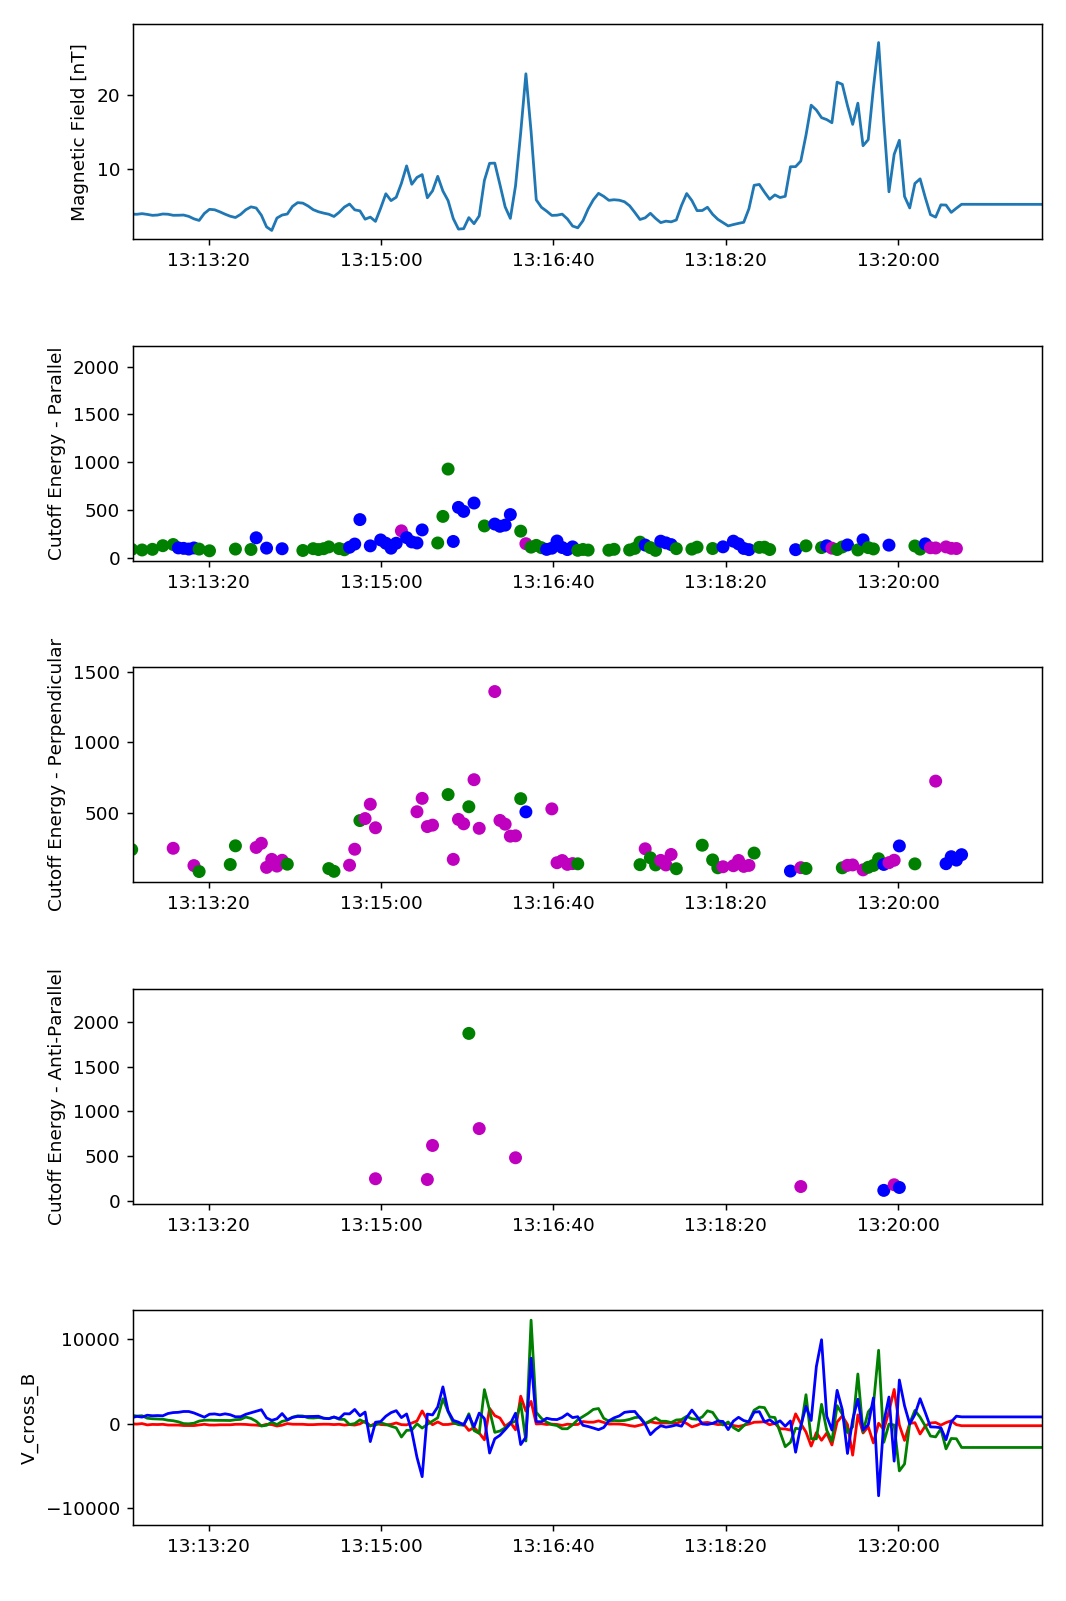

result type: <class 'list'>


In [146]:
#Plot clusters as time series

label_color_map = {0 : 'b', 1 : 'g', 2 : 'm', 3 : 'k', 4 : 'c', 5 : 'r'}
label_color1 = [label_color_map[l] for l in y_kmeans1]
label_color2 = [label_color_map[l] for l in y_kmeans2]
label_color3 = [label_color_map[l] for l in y_kmeans3]

fig = plt.figure(figsize=(8,12))

#ax0 = fig.add_subplot(4,1,1)
#ax0.plot(time,B_magnitude)

ax0 = fig.add_subplot(5,1,1)
ax0.plot(time, B_magnitude)
ax0.set_ylabel('Magnetic Field [nT]')

ax1 = fig.add_subplot(5,1,2, sharex = ax0)
ax1.scatter(time1_kmeans, d1_kmeans[:,1], c=label_color1)
ax1.set_ylabel('Cutoff Energy - Parallel')

ax2 = fig.add_subplot(5,1,3, sharex = ax0)
ax2.scatter(time2_kmeans, d2_kmeans[:,1], c=label_color2)
ax2.set_ylabel('Cutoff Energy - Perpendicular')

ax3 = fig.add_subplot(5,1,4, sharex = ax0)
ax3.scatter(time3_kmeans, d3_kmeans[:,1], c=label_color3)
ax3.set_ylabel('Cutoff Energy - Anti-Parallel')

ax4 = fig.add_subplot(5,1,5, sharex = ax0)
ax4.plot(interp_time,v_cross_B[:,0],'r')
ax4.plot(interp_time,v_cross_B[:,1],'g')
ax4.plot(interp_time,v_cross_B[:,2],'b')
ax4.set_ylabel('V_cross_B')


plt.tight_layout()

set_time()

In [151]:
set_time()

result type: <class 'list'>


## OLD METRIC of using V_cross_B component for clustering (Probably Useless)

In [ ]:
kmeans = KMeans(n_clusters=5).fit(v_cross_B)
y_kmeans = kmeans.predict(v_cross_B)
centers = kmeans.cluster_centers_

In [ ]:
#Plot clusters

fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')

ax.scatter(v_cross_B[:,0],v_cross_B[:,1],v_cross_B[:,2], c=y_kmeans, s=20)
ax.scatter(centers[:,0], centers[:,1],centers[:,2], c='k', s=100, alpha=0.5)

ax.set_title('v_cross_B')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.tight_layout()

In [ ]:
#Plot v X B as time series with cluster colors
#X component
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(4,1,1)

ax1.scatter(time, v_cross_B[:,0], c=y_kmeans, s=20)

ax1.set_ylabel('(X component)')


#Y component
ax2 = fig.add_subplot(4,1,2, sharex=ax1, sharey=ax1)

ax2.scatter(time, v_cross_B[:,1], c=y_kmeans, s=20)

ax2.set_ylabel('v_cross_B [nT * km/s] \n (Y component)')

#Z component
ax3 = fig.add_subplot(4,1,3, sharex=ax1, sharey=ax1)

ax3.scatter(time, v_cross_B[:,2], c=y_kmeans, s=20)

ax3.set_ylabel('(Z component)')

ax4 = fig.add_subplot(4,1,4, sharex=ax1)
ax4.plot(time, B_magnitude)
ax4.set_xlabel('time')

for j in range(len(fig.axes)-1):
    plt.setp(fig.axes[j].get_xticklabels(), visible=False)
        
#ax3.set_xticklabels(unix_to_utc(ax3.get_xticks()));

plt.tight_layout()

set_time()